Capstone Project

Importing pandas liberary

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



Loading the data and Putting in the Variables

In [3]:
df  = pd.read_excel('state_codes.xlsx')
df1 = pd.read_excel('States_Annual_Energy_Generation_Sources_1990_2019.xlsx',header=None)
df2 = pd.read_excel('States_Electric_Vehicle_Registrations_2018 (1).xlsx',header=None)
df3 = pd.read_excel('c:/Users/abc/Desktop/electric vehicle/States_All_Vehicle_Registrations_2018.xlsx',header=None)


Cleaning the dataframe(df3)

In [4]:
df3 = pd.read_excel('c:/Users/abc/Desktop/electric vehicle/States_All_Vehicle_Registrations_2018.xlsx',header=None)
df3.head(50)                               # Exploring the dataframe 
df3.head(20)
x = df3.columns.to_list()
df3.head(5)

df3.loc[0] = df3.iloc[0:11].fillna(' ').agg(''.join) #combining the rows
df3.columns = df3.loc[0]                             #assigning the first row as columns
df3 = df3.drop(df3.index[:12])                       #removing 0 to 12 indexed rows  
df3.reset_index(inplace=True)                        #resetting the index 
df3.drop(columns='index',inplace=True)               #droping the column 'index'
df3.isnull().sum()                                   #checking for the null values    
df3.dropna(inplace=True)                             #removing the null values
df3.shape                                            #exploring the rows and columns of dataframe
df3.duplicated().sum()                               #checking for duplicated values

for i in df3[df3.columns[1:]]:                       #applying loop for changing datatype
    df3[i] = df3[i].astype('int64')
df3.shape


df3.columns[1:16].to_list                            #applying for loop for replacing the
                                                     #outlier with null values
for col in df3.columns[1:16].to_list():

    q1 = df3[i].quantile(0.25)
    q3 = df3[i].quantile(0.75)
    IQR = q3-q1
    min_range = q1-(1.5*IQR)
    max_range = q3+(1.5*IQR)
    
    #df3 = df3[df3[i]<max_range]
    df3.loc[df3[i]>max_range]=np.nan

for i in df3.columns[1:16]:
    df3[i]=df3[i].fillna(df3[i].median())                   # replacing null value by median 
df3[' STATE MOTOR-VEHICLE REGISTRATIONS - 2018  December 2019   STATE  ']=df3[' STATE MOTOR-VEHICLE REGISTRATIONS - 2018  December 2019   STATE  '].fillna('Unknown')    

for i in df3.columns[1:16] :
    df3[i] =  df3[i].astype('int64')

df3.iloc[0,[3,6,9,12]].sum()
df3.columns


Index([' STATE MOTOR-VEHICLE REGISTRATIONS - 2018  December 2019   STATE  ',
       '    (Revised February 2021)  AUTOMOBILESPRIVATE ANDCOMMERCIAL(INCLUDING',
       '         PUBLICLYOWNED (1)', '          TOTAL',
       '       BUSES PRIVATE ANDCOMMERCIAL', '         PUBLICLYOWNED (1)',
       '          TOTAL', '       TRUCKS PRIVATE ANDCOMMERCIAL',
       '         PUBLICLYOWNED (1)', '          TOTAL',
       '       MOTORCYCLES PRIVATE ANDCOMMERCIAL',
       '         PUBLICLYOWNED (1)', '          TOTAL',
       '       ALL MOTOR VEHICLES PRIVATE ANDCOMMERCIAL',
       '         PUBLICLYOWNED (1)', '    TABLE MV-1     TOTAL'],
      dtype='object', name=0)

Exploring and Cleaning the dataframe name --> 'df'

In [5]:
df
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.value_counts().sum()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state_code  51 non-null     object
 1   state_name  51 non-null     object
dtypes: object(2)
memory usage: 948.0+ bytes


,state_code,state_name
0,AK,Alaska
1,AL,Alabama


Exploring and Cleaning the dataframe named --> 'df1' 

In [6]:
df1 = pd.read_excel('States_Annual_Energy_Generation_Sources_1990_2019.xlsx',header=None)
df1.head()
df1.tail()
#df1.info()                                 # summary of the dataframe
df1.describe()                              # statistical summary 
df1= df1.drop(0)                            # delete first empty row 
df1 =df1.reset_index()
df1.columns = df1.iloc[0]                   # set first row as cols name 
df1 =df1.drop(0)
print(df1.columns.tolist())
df1 = df1.drop(columns= df1.columns[0])     # delete the column 
df1.isnull().sum()                          # checking for null values
df1.duplicated().sum()  
df1                    # checking for duplicate val.


[np.int64(1), 'YEAR', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE', 'GENERATION (Megawatthours)']


,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
1,1990,AK,Total Electric Power Industry,Total,5599506
2,1990,AK,Total Electric Power Industry,Coal,510573
3,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
4,1990,AK,Total Electric Power Industry,Natural Gas,3466261
5,1990,AK,Total Electric Power Industry,Petroleum,497116
...,...,...,...,...,...
53752,2019,WY,"Electric Generators, Electric Utilities",Coal,34313690
53753,2019,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,984521
53754,2019,WY,"Electric Generators, Electric Utilities",Natural Gas,411640
53755,2019,WY,"Electric Generators, Electric Utilities",Petroleum,43547


Exploring and Changing datatype of columns

In [7]:
df1['GENERATION (Megawatthours)'] = df1['GENERATION (Megawatthours)'].astype('int64')
df1['YEAR'] = pd.to_datetime(df1['YEAR'],format='%Y').dt.year
df1.info()
df1.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53756 entries, 1 to 53756
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   YEAR                        53756 non-null  int32 
 1   STATE                       53756 non-null  object
 2   TYPE OF PRODUCER            53756 non-null  object
 3   ENERGY SOURCE               53756 non-null  object
 4   GENERATION (Megawatthours)  53756 non-null  int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 1.8+ MB


0
YEAR                           int32
STATE                         object
TYPE OF PRODUCER              object
ENERGY SOURCE                 object
GENERATION (Megawatthours)     int64
dtype: object

Exploring and Cleaning the dataframe named --> 'df2'

In [8]:
df2 = pd.read_excel('States_Electric_Vehicle_Registrations_2018 (1).xlsx',header=None)
df2 = df2.drop(0)
df2 = df2.drop(1)
df2.reset_index()
df2.columns = df2.iloc[0]

df2 = df2.reset_index()
df2 = df2.drop(0)
df2['Registration Count'].isnull().sum()
df2['State'].isnull().sum()
df2.isnull().sum()
df2 = df2.dropna(axis=1)
df2
df2['Registration Count'] = df2['Registration Count'].astype(str)
df2['Registration Count'] =  df2['Registration Count'].astype('int64')

df2 = df2.drop('index',axis=1)
df2.columns.to_list()

['State', 'Registration Count']

Merging(Combining) the data Frame 'df' and 'df1'

In [9]:
# Outer join with different column names
merged_df = pd.merge(df, df1, left_on='state_code', right_on='STATE', how='left')
merged_df.head(2)

,state_code,state_name,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,AK,Alaska,1990,AK,Total Electric Power Industry,Total,5599506
1,AK,Alaska,1990,AK,Total Electric Power Industry,Coal,510573


Merging (Combining the dataframe) "merged_df" and "df2" 

In [10]:

merged_df1 = pd.merge(merged_df,df2, left_on='state_name', right_on='State',how='inner')
merged_df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51529 entries, 0 to 51528
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   state_code                  51529 non-null  object
 1   state_name                  51529 non-null  object
 2   YEAR                        51529 non-null  int32 
 3   STATE                       51529 non-null  object
 4   TYPE OF PRODUCER            51529 non-null  object
 5   ENERGY SOURCE               51529 non-null  object
 6   GENERATION (Megawatthours)  51529 non-null  int64 
 7   State                       51529 non-null  object
 8   Registration Count          51529 non-null  int64 
dtypes: int32(1), int64(2), object(6)
memory usage: 3.3+ MB


Merging and Exploring Dataframes "merged_df1" and "df3"

In [51]:
merged_df2 = pd.merge(merged_df1,df3, left_on='state_name',right_on=' STATE MOTOR-VEHICLE REGISTRATIONS - 2018  December 2019   STATE  ',how='left')
merged_df2.sample()
merged_df2.columns = merged_df2.columns.str.strip()
merged_df2.columns.to_list
merged_df2['TABLE MV-1     TOTAL'] = merged_df2['TABLE MV-1     TOTAL'].fillna(0)
merged_df2['TABLE MV-1     TOTAL'].isnull().sum()
merged_df2['TABLE MV-1     TOTAL'].unique()
merged_df2['TABLE MV-1     TOTAL'] = merged_df2['TABLE MV-1     TOTAL'].astype('int64')
merged_df2.head(10)

,state_code,state_name,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours),State,Registration Count,STATE MOTOR-VEHICLE REGISTRATIONS - 2018 December 2019 STATE,...,TOTAL,TRUCKS PRIVATE ANDCOMMERCIAL,PUBLICLYOWNED (1),TOTAL,MOTORCYCLES PRIVATE ANDCOMMERCIAL,PUBLICLYOWNED (1),TOTAL,ALL MOTOR VEHICLES PRIVATE ANDCOMMERCIAL,PUBLICLYOWNED (1),TABLE MV-1 TOTAL
0,AK,Alaska,1990,AK,Total Electric Power Industry,Total,5599506,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,AK,Alaska,1990,AK,Total Electric Power Industry,Coal,510573,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,AK,Alaska,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,AK,Alaska,1990,AK,Total Electric Power Industry,Natural Gas,3466261,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,AK,Alaska,1990,AK,Total Electric Power Industry,Petroleum,497116,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,AK,Alaska,1990,AK,Total Electric Power Industry,Wind,0,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,AK,Alaska,1990,AK,Total Electric Power Industry,Wood and Wood Derived Fuels,151035,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,AK,Alaska,1990,AK,"Electric Generators, Electric Utilities",Total,4493024,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,AK,Alaska,1990,AK,"Electric Generators, Electric Utilities",Coal,311960,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,AK,Alaska,1990,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,974521,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


3.CORRELATION ANALYSIS:
 TASK 3.1: ANALYZE THE CORRELATION BETWEEN
 ELECTRIC VEHICLE REGISTRATIONS A

Correlation Matrix:
                             Registration Count  GENERATION (Megawatthours)
Registration Count                    1.000000                    0.162206
GENERATION (Megawatthours)            0.162206                    1.000000


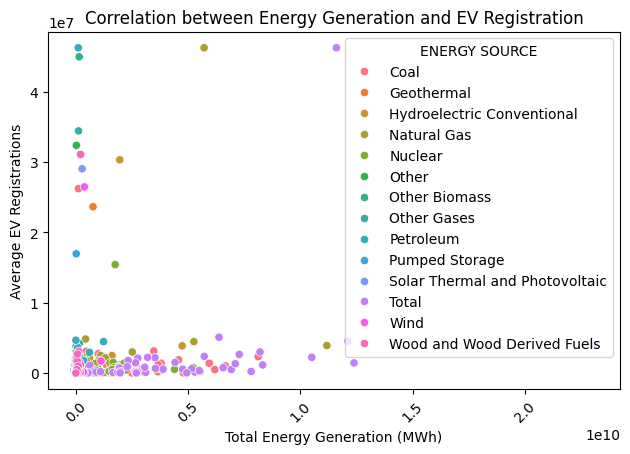

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by ENERGY SOURCE and sum the energy and EV registrations
grouped = merged_df2.groupby(['ENERGY SOURCE','state_name']).agg({
    'GENERATION (Megawatthours)': 'sum',
    'Registration Count': 'sum'   # Average EV registrations for each energy source
}).reset_index()

# Calculate simple correlation matrix
correlation = grouped[['Registration Count','GENERATION (Megawatthours)']].corr()

# Show correlation value between generation and registration count
print("Correlation Matrix:\n", correlation)

# Visualize as a scatterplot
sns.scatterplot(data=grouped,
                x='GENERATION (Megawatthours)',
                y='Registration Count',
                hue='ENERGY SOURCE')
plt.title("Correlation between Energy Generation and EV Registration")
plt.xlabel("Total Energy Generation (MWh)")
plt.ylabel("Average EV Registrations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation Matrix:
                             GENERATION (Megawatthours)  Registration Count
GENERATION (Megawatthours)                    1.000000            0.101798
Registration Count                            0.101798            1.000000


,GENERATION (Megawatthours),Registration Count
GENERATION (Megawatthours),1.000000,0.101798
Registration Count,0.101798,1.000000


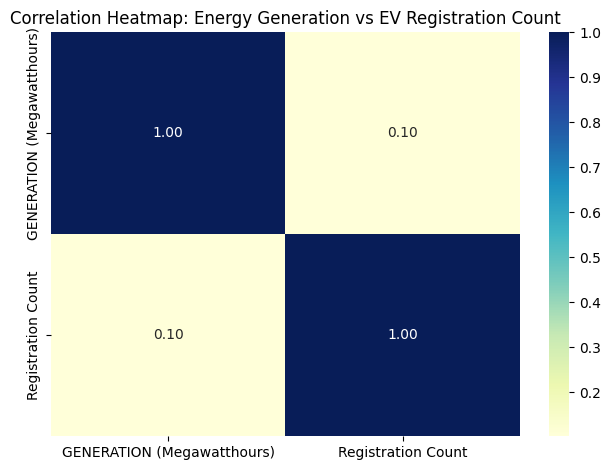

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by ENERGY SOURCE
grouped = merged_df2.groupby(['state_name','ENERGY SOURCE']).agg({
    'GENERATION (Megawatthours)': 'sum',
    'Registration Count': 'mean'
}).reset_index()

# Calculate correlation between the numeric columns only
correlation = grouped[['GENERATION (Megawatthours)', 'Registration Count']].corr()

# Print correlation matrix
print("Correlation Matrix:\n", correlation)

# Plot heatmap
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap: Energy Generation vs EV Registration Count")
plt.tight_layout()
#plt.show()
grouped
correlation.head(10)

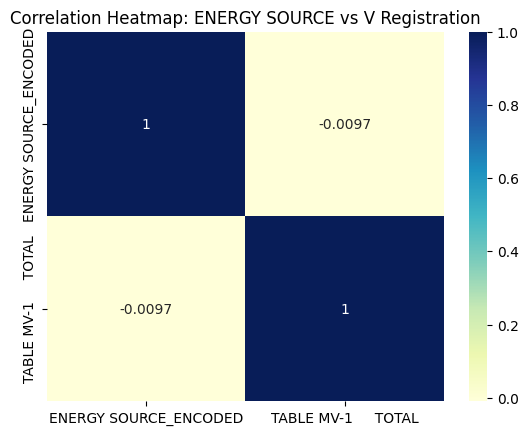

In [13]:
merged_df2['ENERGY SOURCE_ENCODED'] = merged_df2['ENERGY SOURCE'].astype('category').cat.codes

corr = merged_df2[['ENERGY SOURCE_ENCODED', 'TABLE MV-1     TOTAL']].corr()


# heatmap
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap: ENERGY SOURCE vs V Registration")
plt.show()


In [14]:
merged_df2.columns.to_list()



['state_code',
 'state_name',
 'YEAR',
 'STATE',
 'TYPE OF PRODUCER',
 'ENERGY SOURCE',
 'GENERATION (Megawatthours)',
 'State',
 'Registration Count',
 'STATE MOTOR-VEHICLE REGISTRATIONS - 2018  December 2019   STATE',
 '(Revised February 2021)  AUTOMOBILESPRIVATE ANDCOMMERCIAL(INCLUDING',
 'PUBLICLYOWNED (1)',
 'TOTAL',
 'BUSES PRIVATE ANDCOMMERCIAL',
 'PUBLICLYOWNED (1)',
 'TOTAL',
 'TRUCKS PRIVATE ANDCOMMERCIAL',
 'PUBLICLYOWNED (1)',
 'TOTAL',
 'MOTORCYCLES PRIVATE ANDCOMMERCIAL',
 'PUBLICLYOWNED (1)',
 'TOTAL',
 'ALL MOTOR VEHICLES PRIVATE ANDCOMMERCIAL',
 'PUBLICLYOWNED (1)',
 'TABLE MV-1     TOTAL',
 'ENERGY SOURCE_ENCODED']

Time Series Analysis:

 TASK 4.1: CONDUCT TIME SERIES ANALYSIS TO TRACK
 CHANGES IN EV REGISTRATIONS AND ENERGY PRODUCTION
 OVER TIME.

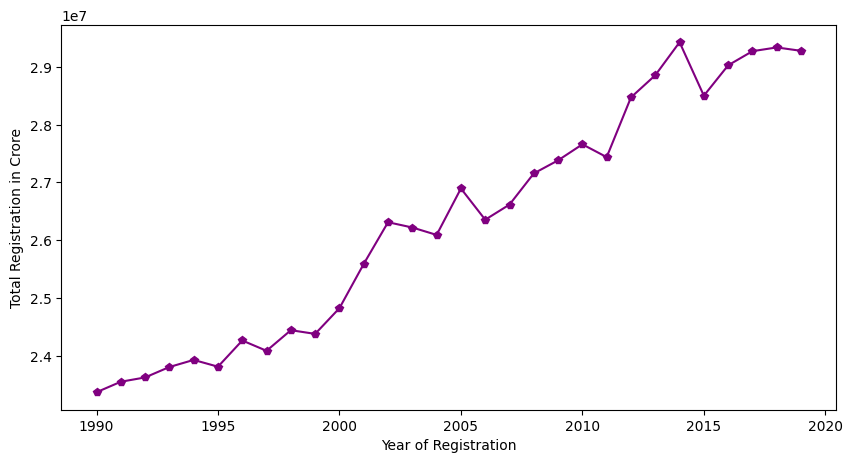

In [15]:
time_trend = merged_df2.groupby(['YEAR'])['Registration Count'].sum()
plt.figure(figsize=(10, 5))
plt.plot(time_trend, marker='p', linestyle='-', color='purple')
plt.xlabel('Year of Registration')
plt.ylabel('Total Registration in Crore')

plt.show()

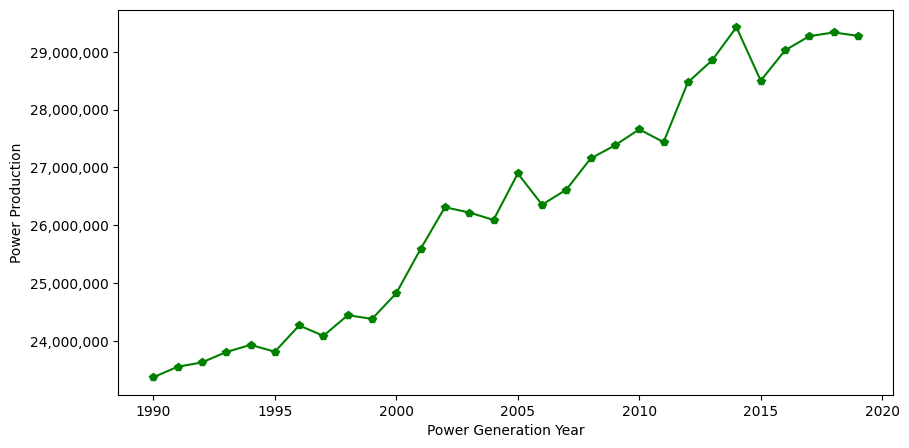

In [16]:
time_trend1 = merged_df2.groupby(['YEAR'])['GENERATION (Megawatthours)'].mean()
plt.figure(figsize=(10, 5))
plt.plot(time_trend, marker='p', linestyle='-', color='green')
plt.xlabel('Power Generation Year')
plt.ylabel('Power Production')
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))



TASK 4.2: IDENTIFY ANY SEASONAL TRENDS OR LONG
TERM SHIFTS IN THE DATA.



TASK 5.1: MAP THE DISTRIBUTION OF EV REGISTRATIONS
 ACROSS STATES USING GEOSPATIAL VISUALIZATION
 TECHNIQUES.
 TASK 5.2: COMPARE THESE DISTRIBUTIONS WITH THE
 LOCATIONS OF MAJOR RENEWABLE ENERGY PROJECTS.

In [17]:
merged_df2.columns.to_list()
#grp = merged_df2.groupby('state_name',as_index=False)['Registration Count'].sum()
merged_df2

,state_code,state_name,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours),State,Registration Count,STATE MOTOR-VEHICLE REGISTRATIONS - 2018 December 2019 STATE,...,TRUCKS PRIVATE ANDCOMMERCIAL,PUBLICLYOWNED (1),TOTAL,MOTORCYCLES PRIVATE ANDCOMMERCIAL,PUBLICLYOWNED (1),TOTAL,ALL MOTOR VEHICLES PRIVATE ANDCOMMERCIAL,PUBLICLYOWNED (1),TABLE MV-1 TOTAL,ENERGY SOURCE_ENCODED
0,AK,Alaska,1990,AK,Total Electric Power Industry,Total,5599506,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11
1,AK,Alaska,1990,AK,Total Electric Power Industry,Coal,510573,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,AK,Alaska,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
3,AK,Alaska,1990,AK,Total Electric Power Industry,Natural Gas,3466261,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
4,AK,Alaska,1990,AK,Total Electric Power Industry,Petroleum,497116,Alaska,530,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51524,WY,Wyoming,2019,WY,"Electric Generators, Electric Utilities",Coal,34313690,Wyoming,170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
51525,WY,Wyoming,2019,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,984521,Wyoming,170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
51526,WY,Wyoming,2019,WY,"Electric Generators, Electric Utilities",Natural Gas,411640,Wyoming,170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
51527,WY,Wyoming,2019,WY,"Electric Generators, Electric Utilities",Petroleum,43547,Wyoming,170,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8


In [18]:

# Grouping data
grp = df2.groupby('State', as_index=False)['Registration Count'].sum()

# Mapping full names to abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add abbreviation column
grp['State Code'] = grp['State'].map(state_abbrev)

# Create choropleth map
fig = px.choropleth(
    grp,
    locations='State Code',          # USE the abbreviations here
    locationmode='USA-states',       # Recognize them as US states
    color='Registration Count',
    scope='usa',
    color_continuous_scale='Reds',
    title='EV Registrations by State (USA)'
)

fig.show()


In [19]:
compare = merged_df2.loc[merged_df2['YEAR'].isin([2019,2018])& merged_df2['ENERGY SOURCE'].isin(["Wind","Wood and Wood Derived Fuels","Solar Thermal and Photovoltaic","Geothermal","Other Biomass","Hydroelectric Conventional"]),['YEAR','TYPE OF PRODUCER','ENERGY SOURCE','state_name','GENERATION (Megawatthours)','Registration Count']]

major_enrgy_project = compare.groupby(['state_name','ENERGY SOURCE']).agg({'GENERATION (Megawatthours)':'mean','Registration Count':'mean'}).reset_index()
max_gen_rows = major_enrgy_project.loc[
    major_enrgy_project.groupby('state_name')['GENERATION (Megawatthours)'].idxmax()
]
max_gen_rows.columns.to_list()


['state_name',
 'ENERGY SOURCE',
 'GENERATION (Megawatthours)',
 'Registration Count']

In [20]:
import matplotlib.pyplot as plt


fig = px.scatter(
    max_gen_rows,
    x='GENERATION (Megawatthours)',
    y='Registration Count',
    #text='state_name',
    title='EV Registrations vs Renewable Energy Generation by State',
    labels={
        'GENERATION (Megawatthours)': 'Renewable Energy Generation (MWh)',
        'Registration Count': 'EV Registrations'
    }
)

fig.update_traces(marker=dict(size=12, color='green', line=dict(width=1, color='DarkSlateGrey')))
fig.show()


In [21]:
max_gen_rows.columns.to_list()

['state_name',
 'ENERGY SOURCE',
 'GENERATION (Megawatthours)',
 'Registration Count']

In [22]:
fig = px.bar(
    max_gen_rows,
    x='state_name',
    y='Registration Count',
    color='GENERATION (Megawatthours)',
    barmode='stack',
    title='Total Renewable + EV Distribution per State'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()
